In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

/home/estudiantes/anaconda/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("IDD.csv",header=None)
ID=df[(df[0]>="760011-99999")&(df[0]<="780160-13601")] 
ID1=ID[0].str.split(pat="-", expand=True) #Separando 
ID["ID"]=ID1[0].astype(int)

esta=pd.read_fwf("ID.txt",header=None)
p=esta[1]
filtered_df = ID[(ID["ID"]).isin(p)]
filtered_df #Encontrando los datos de las estaciones que ocupamos
lat=filtered_df[2].values
lon=filtered_df[3].values
ele=filtered_df[4].values

#Agregando la elevación al dataframe
esta["elevacion"]=ele
esta["Lat"]=lat
esta["Lon"]=lon
esta["Lugar"]=filtered_df[1].values

/tmp/ipykernel_173281/1060579645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID["ID"]=ID1[0].astype(int)


In [5]:
#Cargando los datos 
da_list=[]
for i,ii in enumerate(esta[1]):
    datos=xr.open_dataset(f"/home/andreagvc/data/ERA/ERA/Datos_HAD/{ii}99999_estadisticos.nc")
    datos=datos.assign_coords(estacion=ii)
    datos=datos.expand_dims('estacion')
    da_list.append(datos)
seas=xr.concat(da_list,dim='estacion')

In [6]:
#Seleccionando los datos que van de 1979 en adelante
recorte_seas=seas.where(seas.time.dt.year>1978,drop=True)

In [7]:
#Cálculo del ciclo anual
serieC=recorte_seas.groupby("time.month").mean()
annual_c=serieC.mean("estacion")


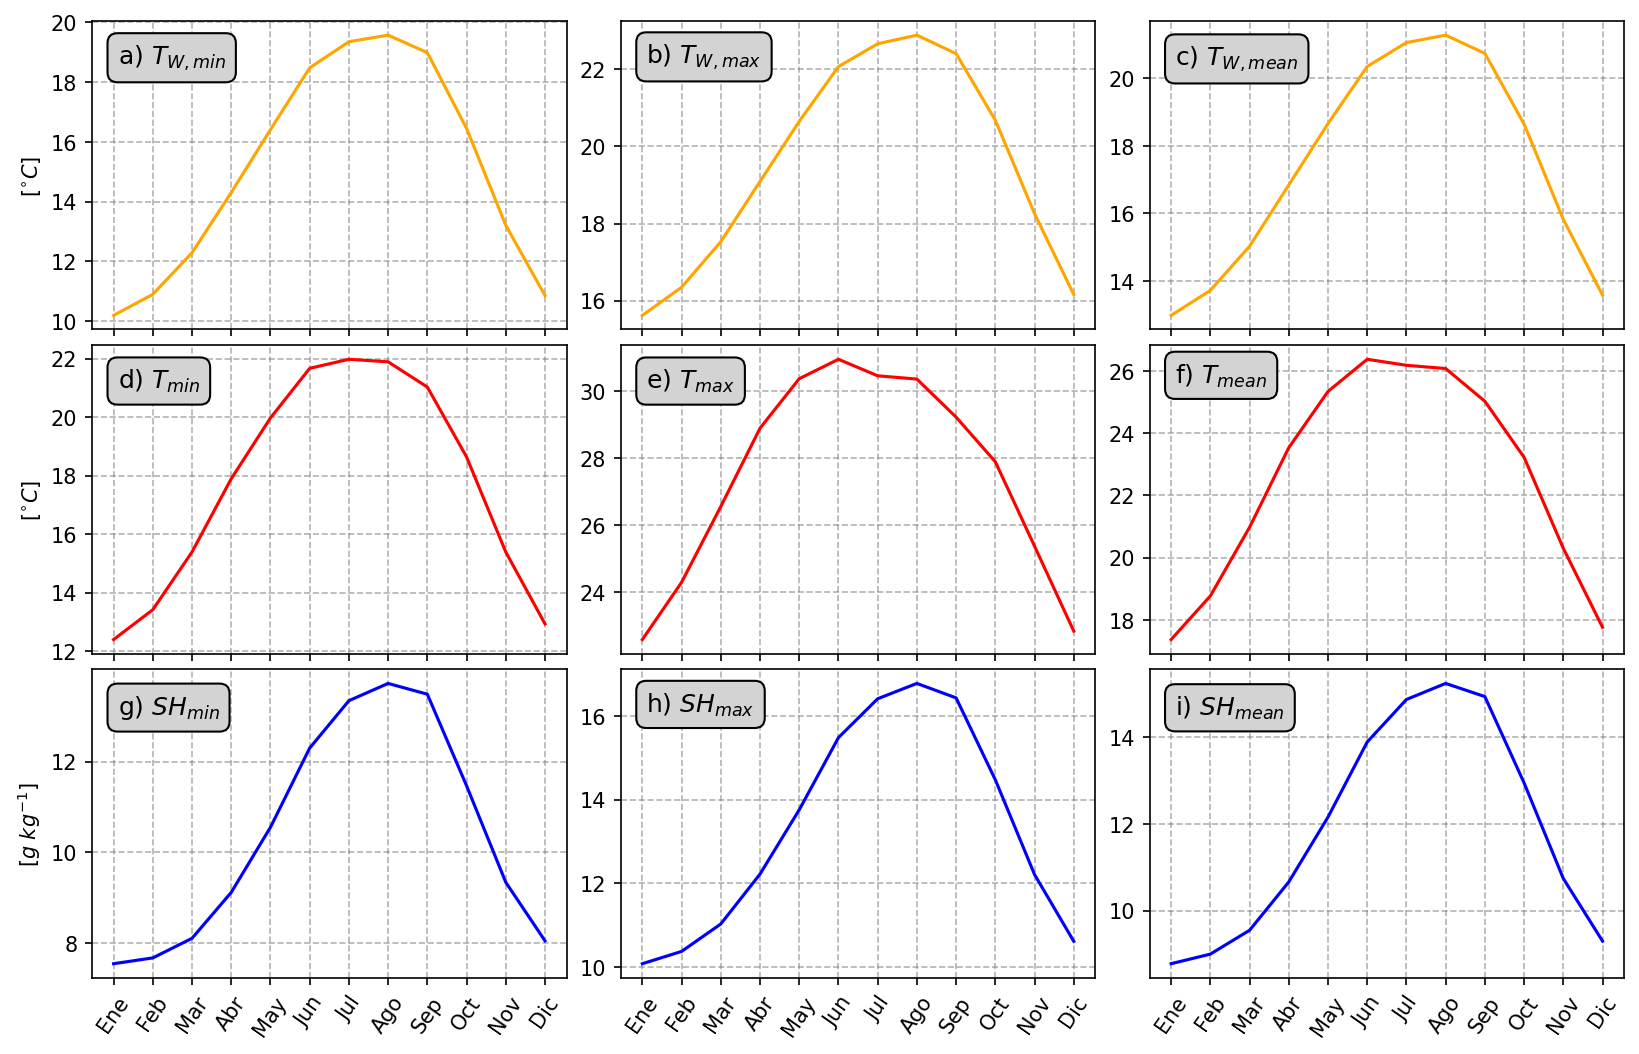

In [9]:
#Ciclo_anual

#promedio
serieC=recorte_seas.groupby("time.month").mean()#.resample(time="YE").mean()
serieCA=serieC.mean("estacion")


fig = plt.figure(figsize=(11,7),dpi=150)
datos=["a) $T_{W,min}$","b) $T_{W,max}$","c) $T_{W,mean}$","d) $T_{min}$","e) $T_{max}$","f) $T_{mean}$","g) $SH_{min}$","h) $SH_{max}$","i) $SH_{mean}$"]
#variables=["$Tw_{min}$","$Tw_{max}$","$Tw_{mean}$","$T_{min}$","$T_{max}$","$T_{mean}$","$SH_{min}$","$SH_{max}$","$SH_{mean}$"]
labels=["$[^{\circ}C]$","$[^{\circ}C]$","$[^{\circ}C]$","$[^{\circ}C]$"," $[^{\circ}C]$","$[^{\circ}C]$","[$g$ $kg^{-1}$]","[$g$ $kg^{-1}$]"," [$g$ $kg^{-1}$]"]
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul', 'Ago','Sep','Oct','Nov','Dic']
n=1
for i,ii in enumerate (np.array(serieCA.variables)):
    if ii=="Twmax" or ii=="Twmin" or ii=="Twmean":
        plt.subplot(3,3,n)
      
        plt.plot(meses,serieCA[ii]-273.15,color="orange")
        plt.grid(linestyle="--", color="grey",alpha=0.6)
        plt.xticks(color="white")
        
        n=n+1
        if ii=="Twmin":
            plt.ylabel(labels[i])
            plt.text(0.1, 19.3, datos[i], fontsize=12, color="black",
            ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                           boxstyle="round", pad=0.4))
        elif  ii=="Twmax" or ii=="Twmean":
            if ii=="Twmax":    
                plt.text(0.1, 22.7, datos[i], fontsize=12, color="black",
                ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                           boxstyle="round", pad=0.4))
            else:
                plt.text(0.1, 21, datos[i], fontsize=12, color="black",
                ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                           boxstyle="round", pad=0.4))
            
    elif ii=="SHmax" or ii=="SHmin" or ii=="SHmean":
        plt.subplot(3,3,n)

        plt.plot(meses,serieCA[ii]*1000,color="blue")
        plt.grid(linestyle="--", color="grey",alpha=0.6)
        
        plt.xticks(rotation=55)
        
        n=n+1
        if ii=="SHmin":
            plt.ylabel(labels[i])
            plt.text(0.1, 13.5, datos[i], fontsize=12, color="black",
            ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                           boxstyle="round", pad=0.4))
            plt.yticks(np.arange(8,13,2))
           
        elif  ii=="SHmax" or ii=="SHmean":
            if ii=="SHmax":
                plt.text(0.1, 16.6
                         , datos[i], fontsize=12, color="black",
                ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                  boxstyle="round", pad=0.4))
            else:
                plt.text(0.1, 15, datos[i], fontsize=12, color="black",
                ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                  boxstyle="round", pad=0.4))
                
           
    
    elif ii=="Tmax" or ii=="Tmin" or ii=="Tmean":
        plt.subplot(3,3,n)
        plt.plot(meses,serieCA[ii],color="red")
        plt.grid(linestyle="--", color="grey",alpha=0.6)
      
        plt.xticks(color="white")
        
        n=n+1
        if ii=="Tmin":
             plt.ylabel(labels[i])
             plt.text(0.1, 21.7
                         , datos[i], fontsize=12, color="black",
                ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                  boxstyle="round", pad=0.4))
            
        elif  ii=="Tmax" or ii=="Tmean":
            if ii=="Tmax":
                plt.text(0.1, 30.7
                         , datos[i], fontsize=12, color="black",
                ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                  boxstyle="round", pad=0.4))
            else:
                plt.text(0.1, 26.3, datos[i], fontsize=12, color="black",
                ha="left", va="top", bbox=dict(facecolor="lightgray", edgecolor="black",
                                  boxstyle="round", pad=0.4))
                
            

    if n==10:
        break
plt.tight_layout(h_pad=-0.9,pad=0.6)

plt.savefig("cicloanualall.svg",dpi=150,bbox_inches="tight")
plt.savefig("cicloanualall.png",dpi=150,bbox_inches="tight")